#import libaries and extract zip files

In [ ]:
import os
import zipfile
import cv2
from google.colab import drive

In [ ]:
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/colab/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c hackathon-online-2022-image-processing #download competition dataset


ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                     9KB  2022-10-06 08:55:25           7207        233  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset              11KB  2022-09-30 04:05:11           5810        188  1.0              
akshaydattatraykhare/car-details-dataset                        Car Details Dataset                                 56KB  2022-10-21 06:11:56           1513         32  1.0              
whenamancodes/students-performance-in-exams                     S

In [ ]:
!unzip /content/hackathon-online-2022-image-processing.zip

Archive:  /content/hackathon-online-2022-image-processing.zip
  inflating: IM_Submit.csv           
  inflating: IM_Test.zipfile         
  inflating: IM_Train.zipfile        


In [ ]:
!mkdir /content/zipfile
!unzip /content/IM_Test.zipfile -d /content/zipfile
!unzip /content/IM_Train.zipfile -d /content/zipfile

Archive:  /content/IM_Test.zipfile
  inflating: /content/zipfile/IM_Test.zipfile  
Archive:  /content/IM_Train.zipfile
  inflating: /content/zipfile/IM_Train.zipfile  


In [ ]:
!mkdir /content/dataset/
!unzip /content/zipfile/IM_Train.zipfile -d /content/dataset
!unzip /content/zipfile/IM_Test.zipfile -d /content/dataset/test
!rm -r /content/zipfile

Streaming output truncated to the last 5000 lines.
 extracting: /content/dataset/test/IM_Test/IM_Test/5499.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/55.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/550.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5500.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5501.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5502.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5503.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5504.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5505.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5506.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5507.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5508.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5509.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/551.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5510.png  
 extracting: /content/d

#look some data

In [ ]:
import json
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os 

In [ ]:
data=pd.read_json("/content/dataset/test/IM_Test/IM_Test.json")
data["bboxes"][8]

[{'bbox_id': 0, 'x1': 27, 'x2': 39, 'y1': 8, 'y2': 26},
 {'bbox_id': 1, 'x1': 40, 'x2': 53, 'y1': 5, 'y2': 23},
 {'bbox_id': 2, 'x1': 52, 'x2': 67, 'y1': 7, 'y2': 25}]

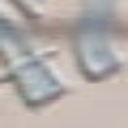

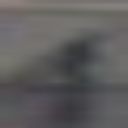

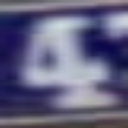

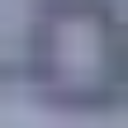

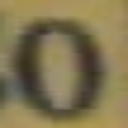

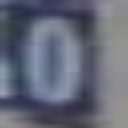

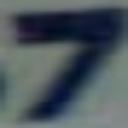

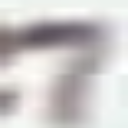

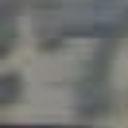

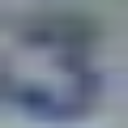

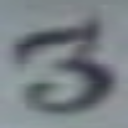

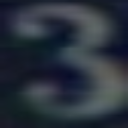

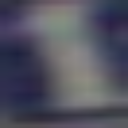

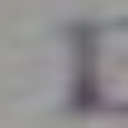

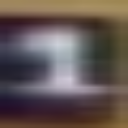

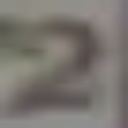

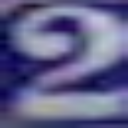

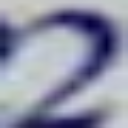

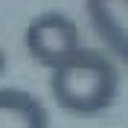

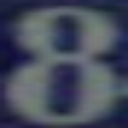

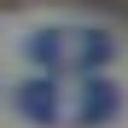

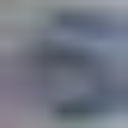

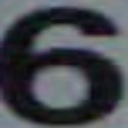

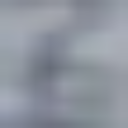

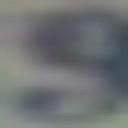

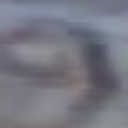

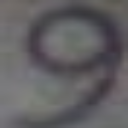

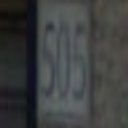

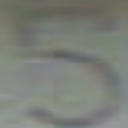

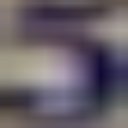

In [ ]:
for filex in os.listdir("/content/dataset/train"):
    for filename in os.listdir(f"/content/dataset/train/{filex}")[0:3]:
      img=cv2.imread(f"/content/dataset/train/{filex}/{filename}")
      img=cv2.resize(img,(128,128))
      cv2_imshow(img)


#ELT

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_images=[]
train_labels=[]
train_dir="/content/dataset/train"
for label in os.listdir("/content/dataset/train"):
  for file1 in os.listdir(f"/content/dataset/train/{label}"):
    img=cv2.imread(f"/content/dataset/train/{label}/{file1}").astype(np.float32)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(40,40))
    img=img/255
    train_labels.append(label)
    train_images.append(img)
train_labels = pd.get_dummies(train_labels).values
train_images = np.array(train_images)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(train_images,train_labels)

#CNN

## import things

In [ ]:
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
import tensorflow as tf

##model Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(filters=40,kernel_size=(3,3),activation='relu',input_shape=(40,40,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=40,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=40,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(1032, activation='relu'))
model.add(Dense(2064, activation='relu'))
model.add(Dense(10, activation='softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )


In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 38, 38, 40)        1120      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 19, 19, 40)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 17, 17, 40)        14440     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 8, 8, 40)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 6, 6, 40)          14440     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 3, 3, 40)        

##callbacks

In [ ]:

cb_reducelr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    mode='min',
    factor=0.1,
    patience=10,
    verbose=1,
    min_lr=0.0001
)

In [ ]:
cb_earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_acc',
    mode='max',
    min_delta=0.001,
    patience=10,
    verbose=1
)

##train eval, plot

In [ ]:
history = model.fit(x_train,y_train,validation_data=[x_test,y_test],callbacks=[cb_reducelr,cb_earlystop],epochs=80)

Epoch 1/80
1717/1717 [==============================] - 9s 5ms/step - loss: 0.9657 - acc: 0.6863 - val_loss: 0.6508 - val_acc: 0.8005 - lr: 0.0010
Epoch 2/80
1717/1717 [==============================] - 8s 5ms/step - loss: 0.5458 - acc: 0.8289 - val_loss: 0.5341 - val_acc: 0.8337 - lr: 0.0010
Epoch 3/80
1717/1717 [==============================] - 8s 5ms/step - loss: 0.4615 - acc: 0.8545 - val_loss: 0.5132 - val_acc: 0.8509 - lr: 0.0010
Epoch 4/80
1717/1717 [==============================] - 8s 5ms/step - loss: 0.4001 - acc: 0.8734 - val_loss: 0.4891 - val_acc: 0.8539 - lr: 0.0010
Epoch 5/80
1717/1717 [==============================] - 8s 5ms/step - loss: 0.3472 - acc: 0.8882 - val_loss: 0.4826 - val_acc: 0.8626 - lr: 0.0010
Epoch 6/80
1717/1717 [==============================] - 8s 5ms/step - loss: 0.3030 - acc: 0.9032 - val_loss: 0.5090 - val_acc: 0.8658 - lr: 0.0010
Epoch 7/80
1717/1717 [==============================] - 8s 5ms/step - loss: 0.2548 - acc: 0.9179 - val_loss: 0.5245 - 

In [ ]:
"""model.save("mymodel2.h5")"""

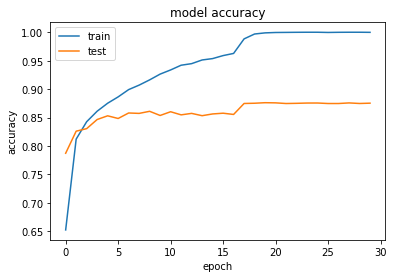

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


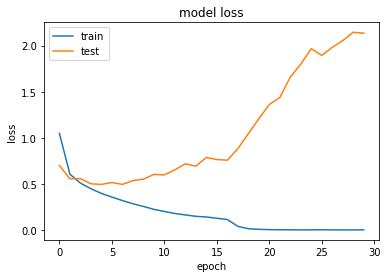

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#test dataset

In [ ]:
data=pd.read_json("/content/dataset/test/IM_Test/IM_Test.json")

In [ ]:
data

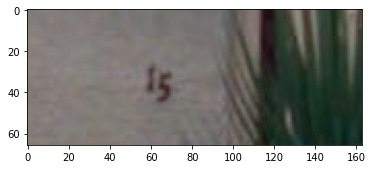

In [ ]:
#look some test data
img=os.path.join("/content/dataset/test/IM_Test/IM_Test/889.png")
img=cv2.imread(img)
plt.imshow(img)

In [ ]:
#find crop size from data
data["bboxes"][888] 

[{'bbox_id': 0, 'x1': 55, 'x2': 63, 'y1': 24, 'y2': 46},
 {'bbox_id': 1, 'x1': 61, 'x2': 70, 'y1': 25, 'y2': 47}]

In [ ]:
#try crop 1 fron 889.png
img1=img[24:46,55:63]
cv2_imshow(img1)

In [ ]:
#try crop 2 from 889.png
img2=img[data["bboxes"][888][1]["y1"]:data["bboxes"][888][1]["y2"],data["bboxes"][888][1]["x1"]:data["bboxes"][888][1]["x2"]]
cv2_imshow(img2)


##ETL

In [ ]:

test_list=[]
for i,filename in enumerate(data["filename"]):
    for box_id in data["bboxes"][i]:
      img=cv2.imread(os.path.join(f"/content/dataset/test/IM_Test/IM_Test/{filename}")).astype(np.float32)
      img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      img=img[box_id["y1"]:box_id["y2"],box_id["x1"]:box_id["x2"]]
      img=cv2.resize(img,(40,40))
      test_list.append(img)

In [ ]:
test_arr=np.array(test_list)

In [ ]:
#check shape dimensions
test_arr.shape 
#👍26032 rows 

(26032, 40, 40, 3)

In [ ]:
#check img
for i in range(0,10):
  cv2_imshow(test_arr[i])

#submission

In [ ]:
IM_Submit=pd.read_csv("/content/IM_Submit.csv")

In [ ]:
IM_Submit

,imageid_boxid,class
0,1_0,NaN
1,2_0,NaN
2,2_1,NaN
3,2_2,NaN
4,3_0,NaN
...,...,...
26027,13067_0,NaN
26028,13067_1,NaN
26029,13067_2,NaN
26030,13068_0,NaN


814/814 [==============================] - 2s 2ms/step
6


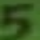

2


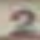

1


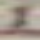

0


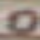

6


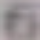

0


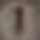

9


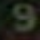

1


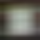

1


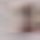

8


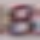

3


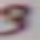

6


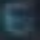

5


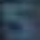

1


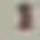

4


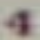

1


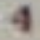

1


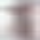

6


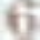

3


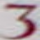

4


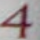

2


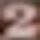

0


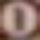

1


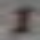

9


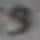

2


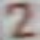

5


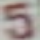

4


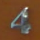

1


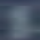

4


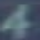

2


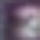

8


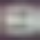

3


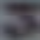

8


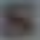

6


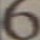

0


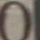

1


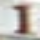

5


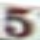

1


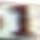

1


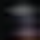

2


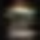

8


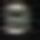

1


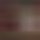

6


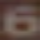

9


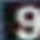

2


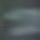

6


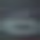

1


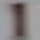

2


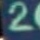

0


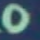

6


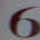

9


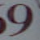

1


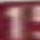

5


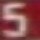

1


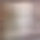

9


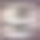

5


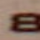

4


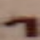

5


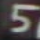

1


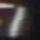

5


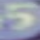

2


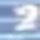

9


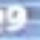

2


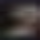

4


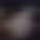

3


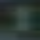

0


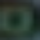

6


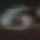

9


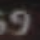

3


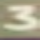

2


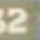

3


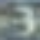

5


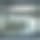

1


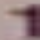

1


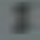

1


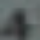

6


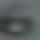

2


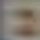

8


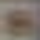

3


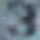

1


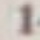

4


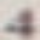

1


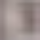

7


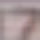

1


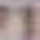

2


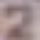

1


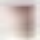

7


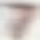

1


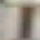

0


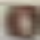

1


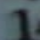

4


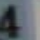

4


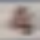

6


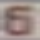

4


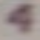

4


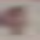

2


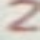

2


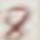

1


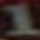

7


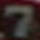

7


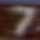

In [ ]:
y_pred=model.predict(test_arr)
for i in range(0,100):
  print(np.argmax(y_pred[i]))
  cv2_imshow(test_arr[i])

In [ ]:
y_pred1=[np.argmax(x) for x in y_pred]

In [ ]:
y_pred1

[6,
 2,
 1,
 0,
 6,
 0,
 9,
 1,
 1,
 8,
 3,
 6,
 5,
 1,
 4,
 1,
 1,
 6,
 3,
 4,
 2,
 0,
 1,
 9,
 2,
 5,
 4,
 1,
 4,
 2,
 8,
 3,
 8,
 6,
 0,
 1,
 5,
 1,
 1,
 2,
 8,
 1,
 6,
 9,
 2,
 6,
 1,
 2,
 0,
 6,
 9,
 1,
 5,
 1,
 9,
 5,
 4,
 5,
 1,
 5,
 2,
 9,
 2,
 4,
 3,
 0,
 6,
 9,
 3,
 2,
 3,
 5,
 1,
 1,
 1,
 6,
 2,
 8,
 3,
 1,
 4,
 1,
 7,
 1,
 2,
 1,
 7,
 1,
 0,
 1,
 4,
 4,
 6,
 4,
 4,
 2,
 2,
 1,
 7,
 7,
 4,
 8,
 2,
 3,
 2,
 2,
 3,
 1,
 8,
 6,
 3,
 7,
 6,
 2,
 6,
 7,
 2,
 7,
 4,
 2,
 8,
 8,
 1,
 7,
 1,
 9,
 1,
 4,
 2,
 2,
 6,
 8,
 3,
 0,
 8,
 2,
 0,
 1,
 0,
 3,
 1,
 2,
 4,
 6,
 7,
 2,
 1,
 3,
 5,
 3,
 1,
 5,
 9,
 1,
 8,
 0,
 6,
 6,
 4,
 6,
 4,
 9,
 3,
 6,
 1,
 6,
 1,
 2,
 8,
 2,
 7,
 5,
 9,
 2,
 1,
 4,
 2,
 9,
 6,
 7,
 1,
 0,
 2,
 1,
 4,
 8,
 3,
 2,
 3,
 6,
 2,
 6,
 1,
 7,
 2,
 3,
 6,
 1,
 1,
 3,
 7,
 2,
 1,
 5,
 0,
 2,
 1,
 0,
 4,
 7,
 1,
 0,
 2,
 3,
 7,
 3,
 1,
 1,
 1,
 2,
 0,
 0,
 7,
 7,
 2,
 9,
 7,
 2,
 2,
 9,
 2,
 5,
 9,
 6,
 1,
 1,
 7,
 7,
 3,
 3,
 7,
 6,
 1,
 8,
 1,
 7,
 3,
 0,
 3,
 6,


In [ ]:
submission = pd.DataFrame({
        "imageid_boxid":IM_Submit["imageid_boxid"],
        "class":y_pred1
    })
submission

,imageid_boxid,class
0,1_0,6
1,2_0,2
2,2_1,1
3,2_2,0
4,3_0,6
...,...,...
26027,13067_0,2
26028,13067_1,2
26029,13067_2,0
26030,13068_0,6


1


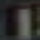

5


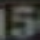

0


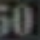

2


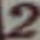

4


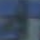

9


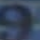

4


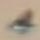

3


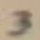

1


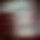

6


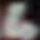

8


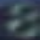

2


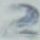

3


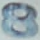

8


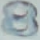

3


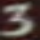

9


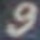

2


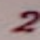

9


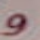

6


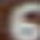

9


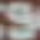

4


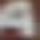

7


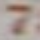

8


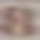

1


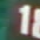

8


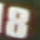

5


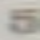

8


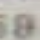

2


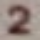

7


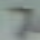

4


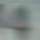

1


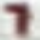

1


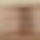

7


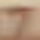

2


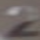

5


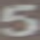

4


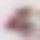

2


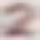

6


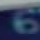

2


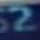

2


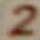

3


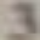

4


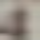

1


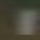

4


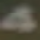

2


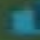

3


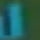

5


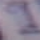

5


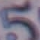

0


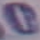

0


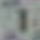

7


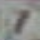

1


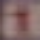

1


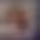

1


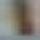

7


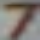

6


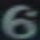

8


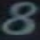

1


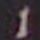

2


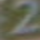

2


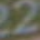

7


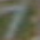

2


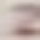

0


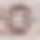

4


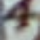

1


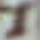

2


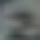

6


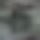

1


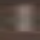

1


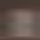

2


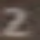

2


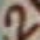

1


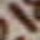

8


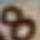

3


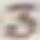

1


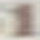

6


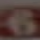

2


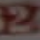

8


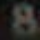

5


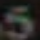

1


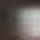

4


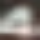

4


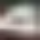

3


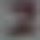

2


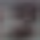

2


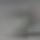

1


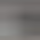

1


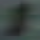

5


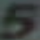

3


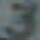

8


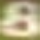

4


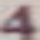

1


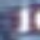

0


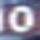

6


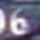

3


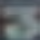

8


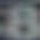

2


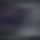

3


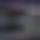

3


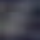

3


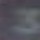

In [ ]:

for i in range(11100,11200):
  print(submission["class"].iloc[i])
  cv2_imshow(test_arr[i])

In [ ]:
#15==85 ,,8,1,3   36==64,, 19==81,, 11==89,,
data1=pd.read_csv("/content/IM_Submit (1).csv")
sum=0
for i,j in enumerate(data1["class"]):
    if(submission["class"].iloc[i]==j):
      sum=sum+1
sum



21238

In [ ]:
12083/26032

0.464159496004917

In [ ]:
20542/26032

0.7891057160417947

In [ ]:
21278/26032

0.8173786109403811

In [ ]:
21218/26032

0.8150737553779963

In [ ]:
submission.to_csv("IM_Submit.csv", index=False)

In [ ]:
!kaggle competitions submit -c hackathon-online-2022-image-processing -f /content/IM_Submit.csv -m "test send submit file from colab"

100% 233k/233k [00:01<00:00, 215kB/s]
400 - Bad Request


In [ ]:
"""!kaggle competitions submit -c hackathon-online-2022-image-processing -f /content/drive/MyDrive/colab/sample_submission.csv -m "test send submit file from Google Drive""""